In [6]:
import sys
print(sys.executable)

/Users/imaddar/miniconda3/envs/soccer-tracker/bin/python


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [8]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

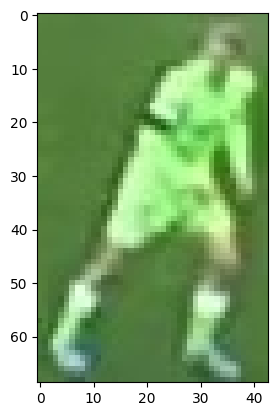

In [9]:
plt.imshow(image)
plt.show()

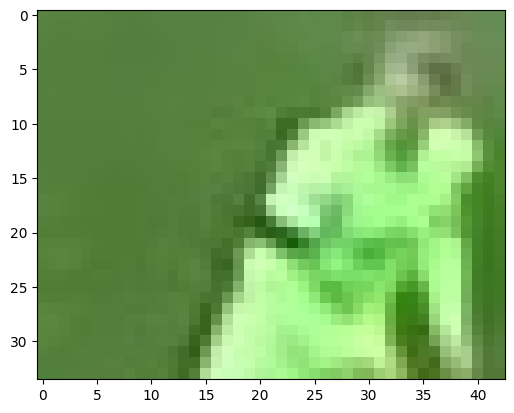

In [10]:
# take the top half of the image for jersey color
top_half_image = image[0:image.shape[0]//2, :]
plt.imshow(top_half_image)
plt.show()

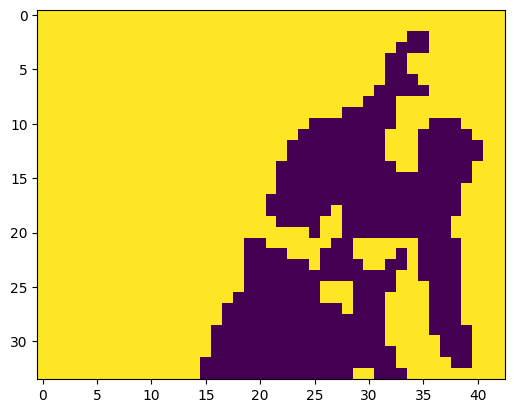

In [11]:
# Cluster the image on the colors to get the predominant jersey color
image_2d = top_half_image.reshape((-1, 3))

# perform k means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster Labels
labels = kmeans.labels_

# reshape labels into the original image dimensions
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non-player cluster:", non_player_cluster)

Non-player cluster: 1


In [14]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([168.68316832, 234.08168317, 143.2970297 ])